# Imports and file loading

In [1]:
import numpy as np
import cine
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.animation as animation
%matplotlib inline
import imageio
from scipy.ndimage.interpolation import rotate
from math import cos, sin
import time
import random
import string
import optical_imaging as oi
import copy
import oi_file
reload(oi)
reload(oi_file)
from scipy.ndimage.filters import gaussian_filter
import resistive_pulse as rp
import os
pi=3.14159
import cv2
reload(cine)

<module 'cine' from 'cine.pyc'>

In [5]:
file_directory = '/home/preston/Desktop/Science/Research/cancer_cells/data/10-18-2016/'
file_name = 'hct-116_20-50-20_mcell_pr0030_0000.cine'
file_path = file_directory + file_name
vid = cine.Cine(file_path)

('C', 'I', ',', '\x00', '\x00', '\x00', '\x01', '\x00', 0, 129792, 0, 129792, 44, 84, 2606356, 2085228099, 1476840993)


# Define template image and stage

- 'first_cell_imaging':
    - c0: 210, 145
    - c1: 207, 129
    - c2: 298, 125
    - c3: 300, 140
    
- 7-4-2016
    - mix_0001
        - c0: 426, 233
        - c1: 426, 217
        - c2: 517, 217
        - c3: 517, 233
        
- 7-10-2016
    - HCT_0000
        - c0:
        - c1:
        - c2:
        - c3:

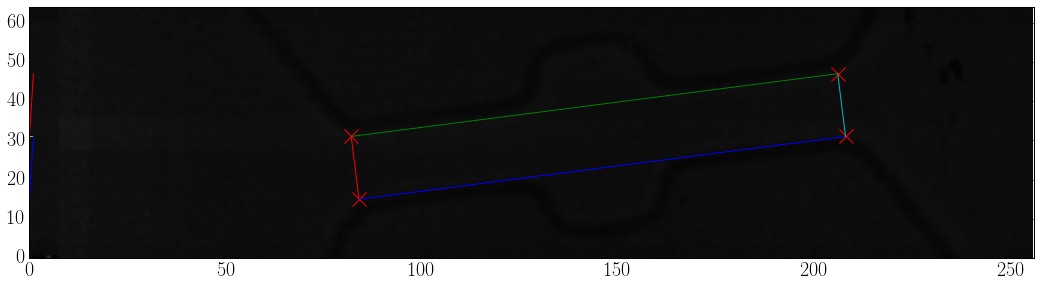

In [42]:
template_frame = vid.get_frame(0)


c0 = np.array([84,15])
c1 = np.array([82,31])
c2 = np.array([208,31])
c3 = np.array([206,47])
c = np.array([c0, c1, c2, c3])
stage = oi.Stage(template_frame, c0, c1, c2, c3)

fig = plt.figure(figsize = (18,12))

plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1, origin = 'lower')

plt.scatter(c[:,0], c[:,1], marker = 'x', s = 200, c = 'red')
plt.plot([c0[0], c2[0]], [c0[1], c2[1]])
plt.plot([c1[0], c3[0]], [c1[1], c3[1]])
plt.plot([c0[0], c1[0]], [c0[1], c1[1]])
plt.plot([c2[0], c3[0]], [c2[1], c3[1]])
plt.plot([c1, c2])
plt.plot([c0, c1])
plt.plot([c2, c3])

plt.tick_params(labelsize = 20)

plt.xlim(0, vid._image_width)
plt.ylim(0, vid._image_height)

plt.show()

# Optimize alpha, beta

### Show image, template image, difference

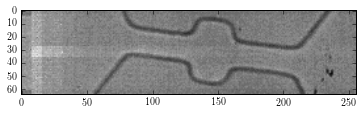

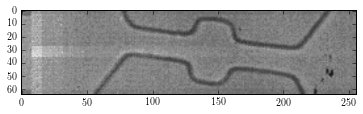

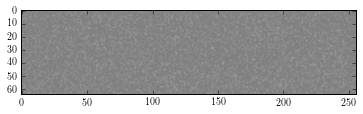

0


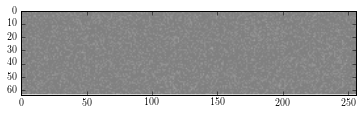

In [16]:
reload(oi_file)
index = 26900


frame = vid.get_frame(index)
template_frame = vid.get_frame(0)


alpha = 10
template_frame= oi_file.change_frame_contrast(template_frame, alpha = alpha)
frame = oi_file.change_frame_contrast(frame, alpha = alpha)

#template_frame = cv2.GaussianBlur(template_frame, (5,5), 0)
#frame = cv2.GaussianBlur(frame, (5,5), 0)

#cutoff = .52

#frame[frame > cutoff] = 1
#frame[frame <= cutoff] = 0

#template_frame[template_frame > cutoff] = 1
#template_frame[template_frame <= cutoff] = 0

threshold_difference = 0.05
cluster_threshold = 50


neg_frame = abs(frame - template_frame)
neg_frame = neg_frame + 0.5

plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()
plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()
plt.imshow(neg_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()


clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                             cluster_threshold = cluster_threshold)
plt.imshow(neg_frame, cmap = 'gray', vmin = 0, vmax = 1)
print len(clusters)
for cluster in clusters:
    plt.scatter(cluster[:,1], cluster[:,0])
    pass
plt.xlim(0, neg_frame.shape[1])
plt.ylim(neg_frame.shape[0], 0)
plt.show()

### Show frames with particle passing

695 clusters:  2


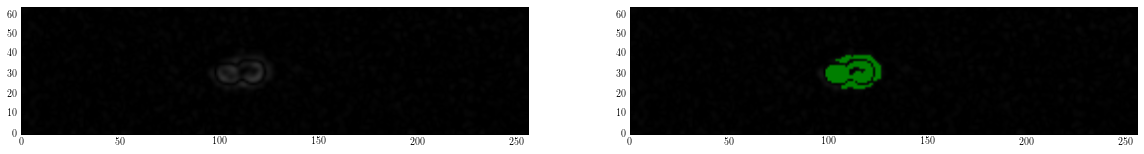

696 clusters:  1


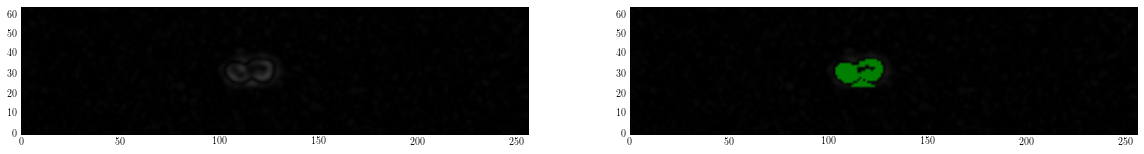

697 clusters:  1


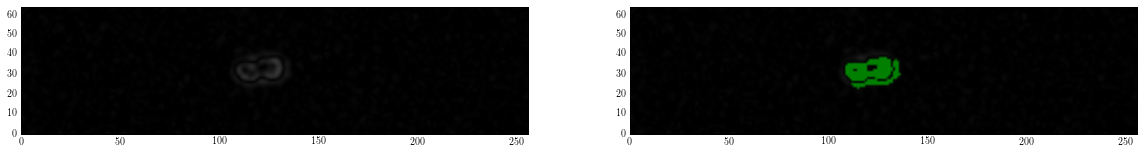

698 clusters:  1


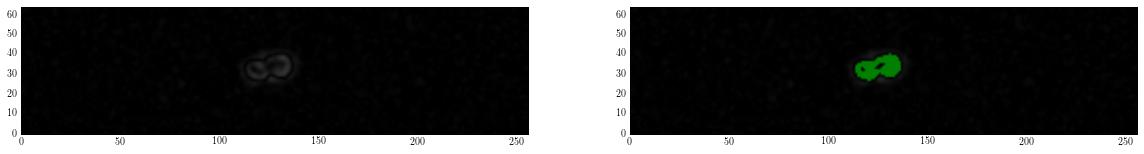

699 clusters:  1


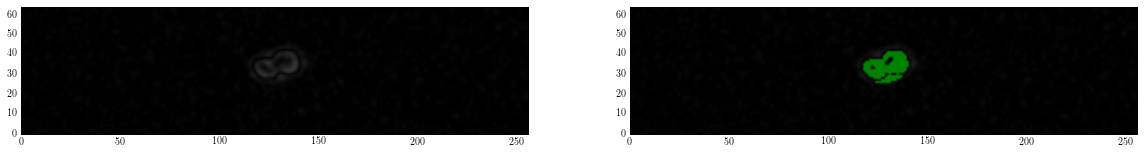

700 clusters:  1


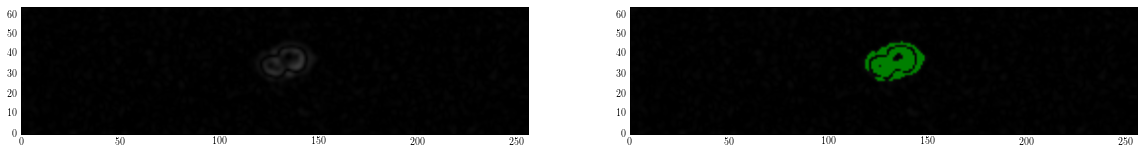

701 clusters:  1


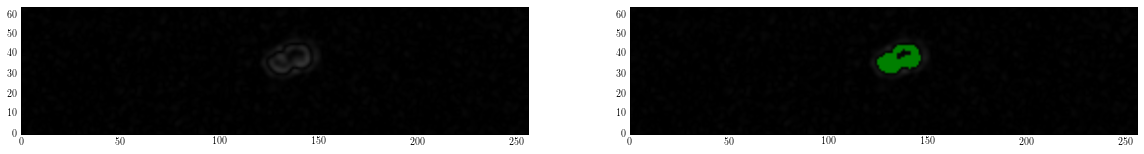

702 clusters:  1


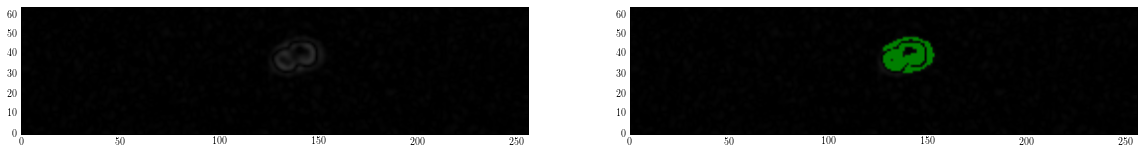

703 clusters:  1


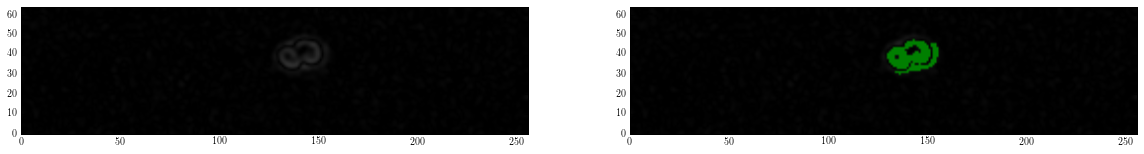

704 clusters:  1


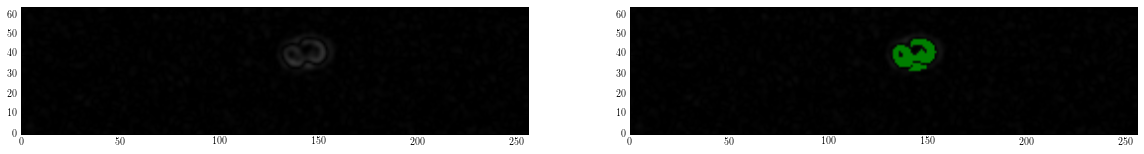

In [17]:
template_frame = vid.get_frame(0)
template_frame = oi_file.change_frame_contrast(template_frame, alpha = alpha)
template_frame = cv2.GaussianBlur(template_frame, (5,5), 0)

for i in range(695, 705):
    index = i
    
    frame = vid.get_frame(index)
    frame = oi_file.change_frame_contrast(frame, alpha = alpha)
    frame = cv2.GaussianBlur(frame, (5,5), 0)
       

    clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                                 cluster_threshold = cluster_threshold)
    print index, 'clusters: ', len(clusters)
    
    rgb_frame = np.empty((frame.shape[0], frame.shape[1], 3))
    rgb_frame[:,:,:] = abs(template_frame[:,:,np.newaxis]-frame[:,:, np.newaxis])
    
    
    
    
    fig, (ax0, ax1) = plt.subplots(1,2, figsize = (20,10))
    ax0.imshow(abs(template_frame - frame), cmap = 'gray', vmin = 0, vmax = 1)
    ax0.set_xlim(0,rgb_frame.shape[1])
    ax0.set_ylim(0,rgb_frame.shape[0])
    
    
    for cluster in clusters:
        for pix in cluster:
            rgb_frame[pix[0], pix[1], 0] = 0.
            rgb_frame[pix[0], pix[1], 1] = .5
            rgb_frame[pix[0], pix[1], 2] = 0.
    
    
    ax1.imshow(rgb_frame, cmap = 'gray', vmin = 0, vmax = 1)
    ax1.set_xlim(0,rgb_frame.shape[1])
    ax1.set_ylim(0,rgb_frame.shape[0])
    
    plt.show()

# Find events

### Replace pixels in template frame if it has a particle in it

0.495956420898
(64, 256)


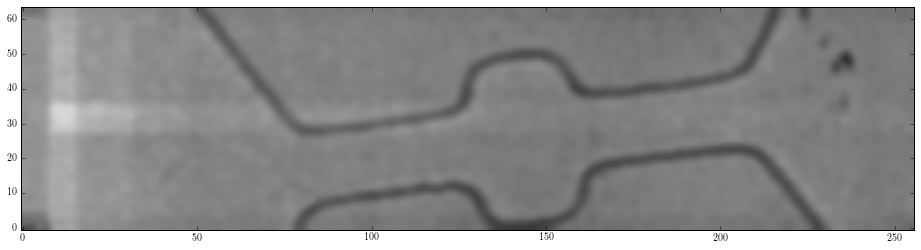

In [10]:
rep_value_0 = .468431
rep_value_1 = .478431
rep_value_2 = .471431
rep_value_3 = .461431
print template_frame[40,120]

print template_frame.shape


#temp_template_frame = copy.copy(template_frame)
#temp_template_frame[310-10:310+10,148-10:148+10] = rep_value_0
#temp_template_frame[270-10:270+10,431-10:431+10] = rep_value_1
#temp_template_frame[281-10:281+10,510-10:510+10] = rep_value_2
#temp_template_frame[158-10:158+10,491-10:491+10] = rep_value_2
#temp_template_frame[70-10:70+10,548-10:548+10] = rep_value_3



fig = plt.figure(figsize = (16,12))
plt.imshow(template_frame,  cmap = 'gray', vmin = 0, vmax = 1, origin = 'lower')
plt.show()

### Find the events

In [18]:
reload(oi)
raw_events=oi.find_events_cine(vid, threshold_difference = threshold_difference, cluster_threshold = cluster_threshold, alpha = alpha)

optical_imaging.py:55: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


t:  1000 / 129792 	clusters: 0 	active: 0 	inactive: 18
t:  2000 / 129792 	clusters: 0 	active: 0 	inactive: 18
t:  3000 / 129792 	clusters: 0 	active: 0 	inactive: 18
t:  4000 / 129792 	clusters: 0 	active: 0 	inactive: 18
t:  5000 / 129792 	clusters: 0 	active: 0 	inactive: 40
t:  6000 / 129792 	clusters: 0 	active: 0 	inactive: 40
t:  7000 / 129792 	clusters: 0 	active: 0 	inactive: 54
t:  8000 / 129792 	clusters: 0 	active: 0 	inactive: 93
t:  9000 / 129792 	clusters: 2 	active: 3 	inactive: 160
t:  10000 / 129792 	clusters: 0 	active: 0 	inactive: 208
t:  11000 / 129792 	clusters: 0 	active: 0 	inactive: 208
t:  12000 / 129792 	clusters: 0 	active: 0 	inactive: 247
t:  13000 / 129792 	clusters: 0 	active: 0 	inactive: 247
t:  14000 / 129792 	clusters: 0 	active: 0 	inactive: 247
t:  15000 / 129792 	clusters: 0 	active: 0 	inactive: 287
t:  16000 / 129792 	clusters: 2 	active: 2 	inactive: 325
t:  17000 / 129792 	clusters: 0 	active: 0 	inactive: 359
t:  18000 / 129792 	clusters: 0

In [19]:
print len(raw_events)

2269


In [20]:
for event in raw_events:
    print len(event._detections)

13
16
32
4
1
2
8
29
2
3
1
6
4
3
22
6
3
20
6
12
3
7
1
9
5
3
4
3
6
2
1
3
10
4
1
1
19
4
16
22
1
23
44
9
5
1
7
1
1
12
23
23
10
5
10
28
1
3
11
4
18
11
3
1
1
3
13
4
51
15
10
8
4
3
4
13
3
5
1
8
7
5
3
3
1
1
8
6
4
7
10
9
29
1
9
1
48
2
1
2
1
1
45
1
1
2
11
5
2
1
13
1
8
6
2
1
2
23
21
6
23
10
2
1
1
1
16
1
1
8
9
2
4
1
5
3
5
2
3
2
3
6
4
3
5
2
1
3
2
2
2
7
1
4
1
8
2
2
1
1
7
8
9
1
8
1
1
1
8
21
1
1
9
27
1
4
1
1
1
3
2
9
1
1
10
2
1
1
27
7
1
7
2
2
2
2
3
2
1
7
4
3
1
5
6
1
12
13
1
6
2
20
2
10
5
10
3
2
3
4
1
1
8
5
2
7
3
7
3
3
7
1
4
4
5
1
14
2
9
1
1
3
13
10
5
22
7
14
6
1
8
4
3
16
1
4
8
5
9
6
7
2
4
2
7
4
2
4
3
1
6
2
7
1
2
2
4
4
6
9
6
2
10
23
6
8
26
2
2
9
8
7
4
9
1
2
1
10
1
1
5
6
1
1
7
4
3
11
4
3
3
5
5
10
6
5
3
1
4
1
9
6
2
19
10
2
43
2
1
10
1
33
1
1
9
1
8
1
1
1
1
15
10
13
12
7
1
15
51
2
3
3
12
2
5
3
3
11
13
13
4
3
1
4
2
5
9
3
2
2
2
2
2
2
4
5
1
4
1
3
3
1
1
3
10
11
40
5
17
2
10
12
14
49
37
5
31
7
1
1
1
72
1
1
77
1
11
2
9
14
1
37
1
1
1
1
1
2
2
1
1
5
4
4
66
6
41
9
36
5
1
19
5
6
4
4
2
2
2
4
1
7
1
7
4
3
2
2
8
1
31
18
1

##### Save events

In [ ]:
reload(oi_file)

In [ ]:
oi_file.save_oi_events_json('/home/preston/Desktop/Science/Research/cancer_cells/data/10-5-2016/events/\
10um_ps_0_10000fps_events',\
                       raw_events)

In [21]:
events = copy.deepcopy(raw_events)

##### Load events

In [ ]:
reload(oi_file)
reload(oi)

In [ ]:
events = oi_file.load_oi_events_json('/home/preston/Desktop/Science/Research/cancer_cells/data/10-5-2016/events/\
10um_ps_0_10000fps_events')

print len(events)

### Event post-processing

##### Connect loose

In [22]:
print len(events)
events = oi.connect_loose_events(copy.deepcopy(events), tf_sep_threshold = 5, dist_threshold = 10)
print len(events)

2269
1116


##### Remove events that don't enter, exit channel

In [43]:
for i, event in enumerate(events):
    event.get_channel_enter_exit_tf(stage)
    
print len(events)
events = [event for event in events if (event._channel_enter_tf != None) and (event._channel_exit_tf != None)]
print len(events)

1116
29


# Create trajectory plot

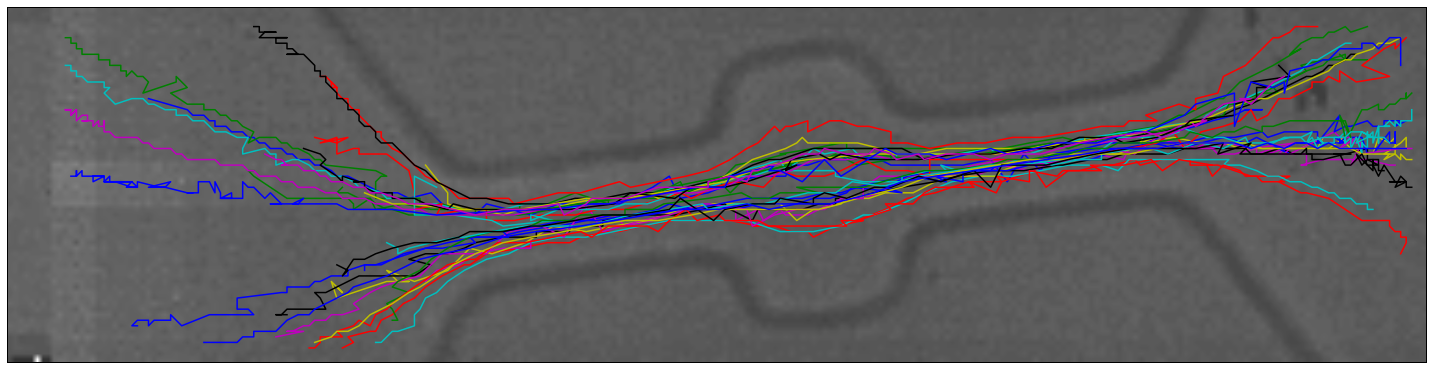

In [44]:
fig = plt.figure(figsize = (20,12))

#colors = cm.rainbow()

#gs = gs.GridSpec(2, 2)

for i, event in enumerate(events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 1.5)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()

#plt.savefig('/home/preston/Desktop/Science/Research/cancer_cells/10-5-2016_10um_0_10000fps.png', dpi = 300)

plt.show()

In [ ]:
file_directory_bvi = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/'
file_directory_gallery = file_directory_bvi.split('bvi')[0] + 'events/oi_gallery/'
if not os.path.exists(file_directory_gallery):
    os.makedirs(file_directory_gallery)
    
gallery_base_name = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/HCT-116_pr0005_0000.bvi'
gallery_base_name = gallery_base_name.split('bvi')[-2].replace('/', '').replace('.','')+'_'

In [ ]:
def create_event_gallery(event_num):
    px_list = []
    py_list = []
    
    directory = file_directory_bvi.split('/')[0]+'/'
    
    for i, det in enumerate(events[event_num]._detections[:1]):
        px_list.append(det._px)
        py_list.append(det._py)
        fig = plt.figure(figsize = ((12,6)))
        plt.imshow(oi_file.get_frame_bvi(file_path_bvi, det._tf, 256, 512), alpha=0.5, cmap = 'gray', origin = 'lower')
        
        plt.plot(px_list, py_list)
        
        plt.savefig(file_directory_gallery + gallery_base_name + str(event_num) + '-' + str(i) + '.png' )

# Find particle edges

In [46]:
template_index = 0
event_index = 4

indices = [det._tf for det in events[event_index]._detections]

template_frame = vid.get_frame(0)
template_frame = oi_file.change_frame_contrast(template_frame, alpha = alpha)
template_frame = cv2.GaussianBlur(template_frame, (5,5), 0)

frames = [vid.get_frame(index) for index in indices]
frames = [oi_file.change_frame_contrast(frame, alpha = alpha) for frame in frames]
frames = [cv2.GaussianBlur(frame, (5,5), 0) for frame in frames]

neg_frames = [abs(frame - template_frame) for frame in frames]

clusters = [det._pixels for det in events[event_index]._detections]

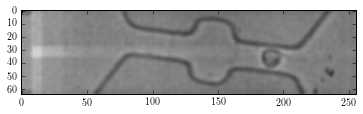

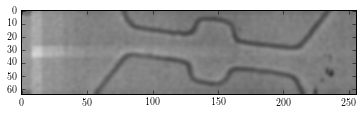

In [48]:
plt.imshow(frames[30], cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

# Canny method
- image preprocessing
- convolve image with Sobel kernels to find gradients; gradient direction is rounded to one of four angles
- non-maximum suppression: (thinning the edges)
- Hysteresis thresholding: check to see if maximum gradient in a detected edge exceeds a max value, or falls below a min value

0
0 31 56 94


/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


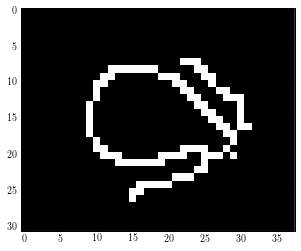

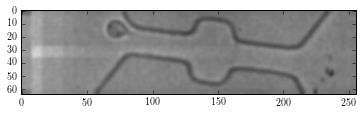

1
0 32 58 97


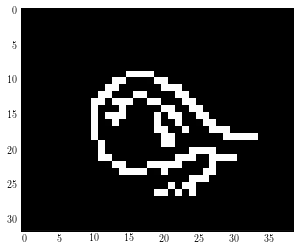

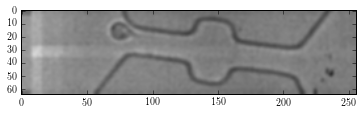

2
2 33 62 100


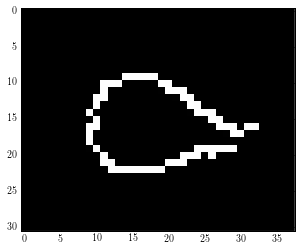

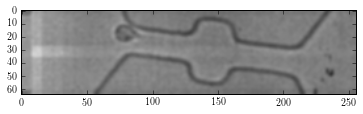

3
3 35 65 103


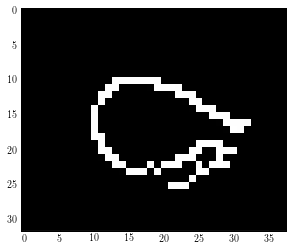

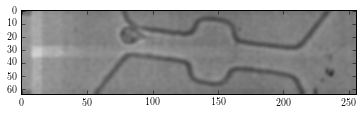

4
5 36 70 108


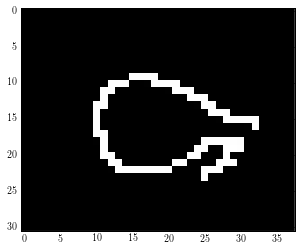

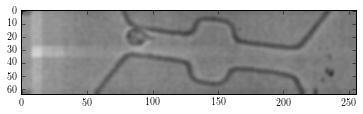

5
3 38 72 116


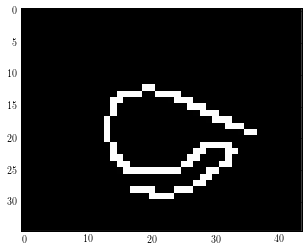

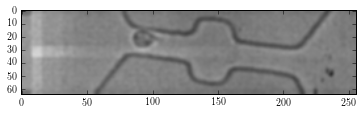

6
6 38 76 113


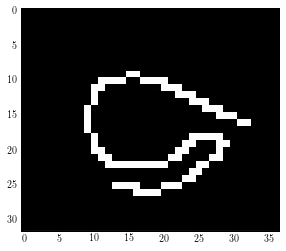

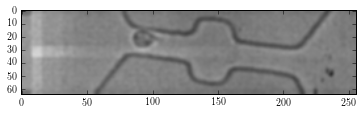

7
7 39 81 118


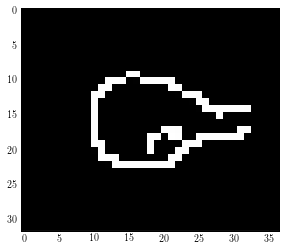

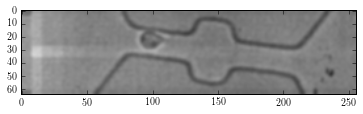

8
7 43 83 124


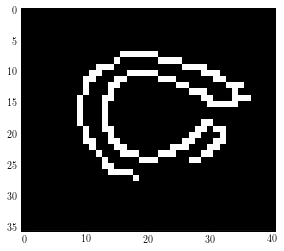

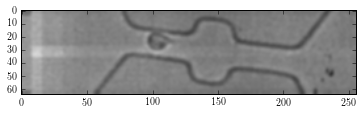

9
8 44 88 130


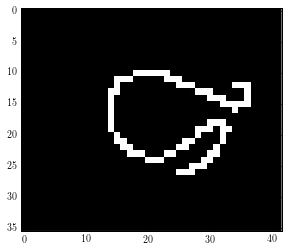

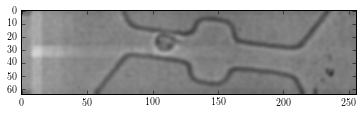

10
8 41 92 130


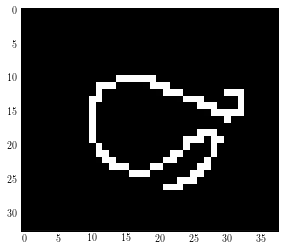

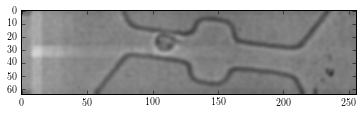

11
9 42 98 135


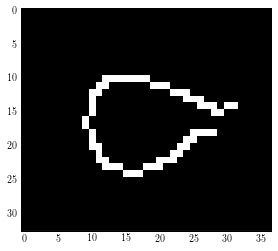

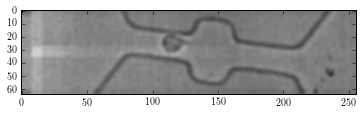

12
8 46 100 141


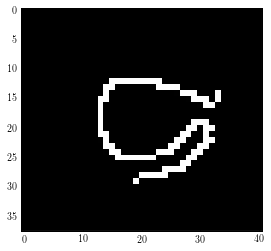

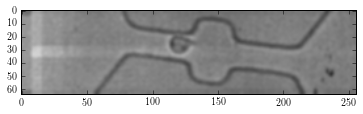

13
11 43 109 144


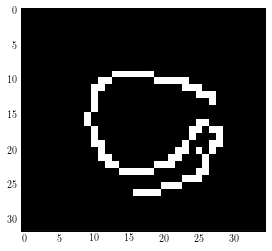

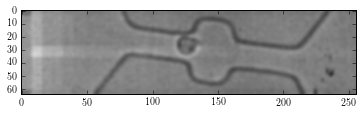

14
11 44 114 149


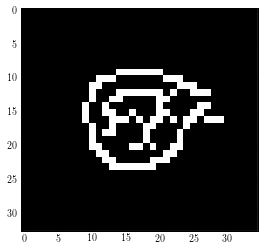

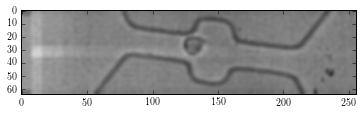

15
7 44 115 148


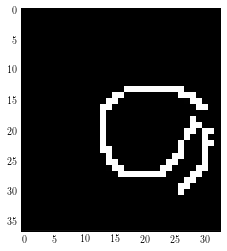

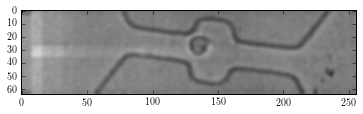

16
10 44 118 153


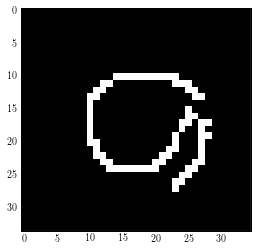

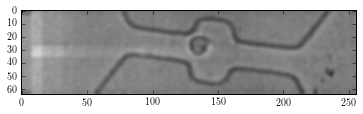

17
7 44 118 154


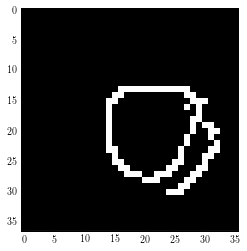

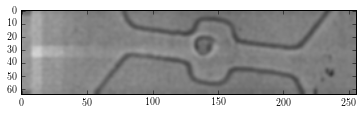

18
10 44 122 156


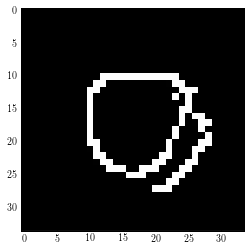

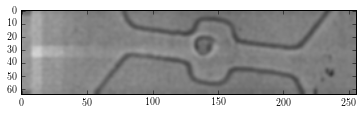

19
7 45 121 159


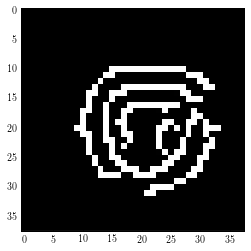

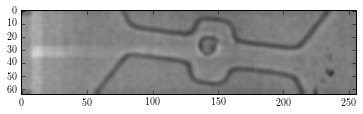

20
8 44 125 163


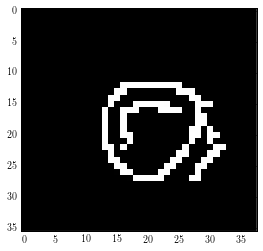

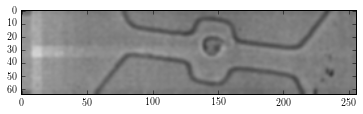

21
8 48 128 169


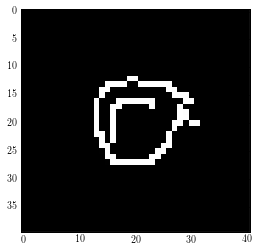

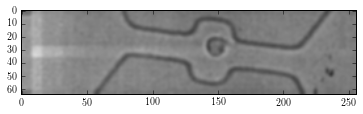

22
9 49 131 173


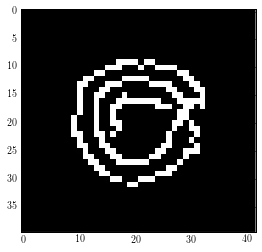

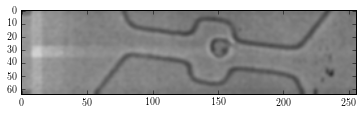

23
10 48 134 174


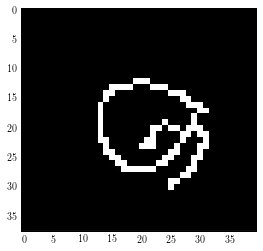

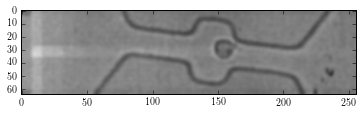

24
12 48 137 178


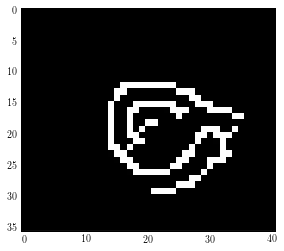

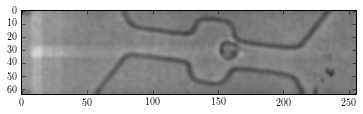

25
16 50 142 182


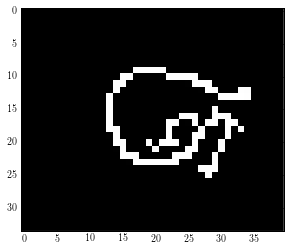

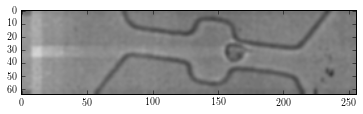

26
17 50 150 188


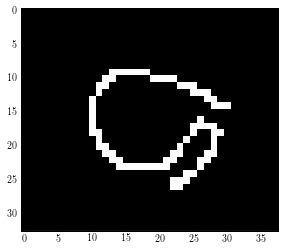

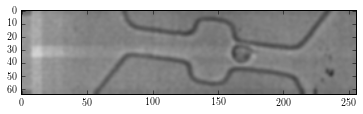

27
15 51 155 194


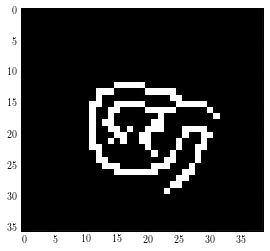

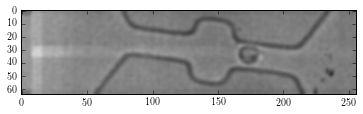

28
19 52 162 197


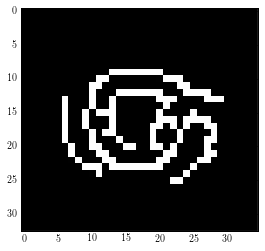

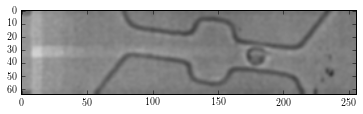

29
16 53 163 206


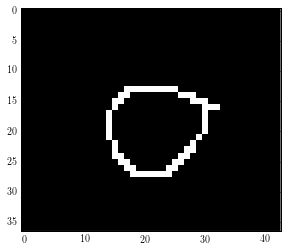

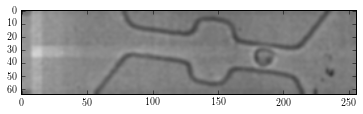

30
20 53 173 209


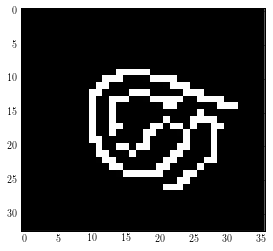

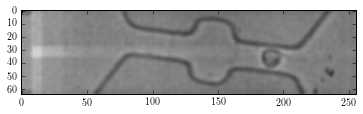

31
21 54 179 214


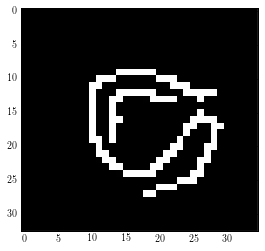

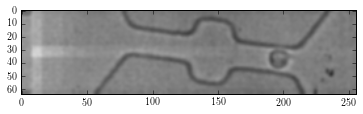

32
18 54 181 222


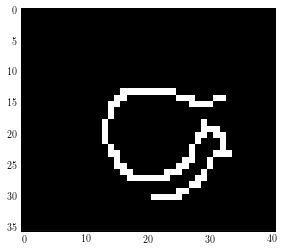

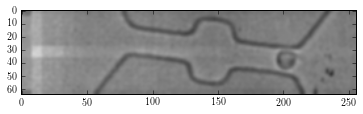

33
21 55 185 219


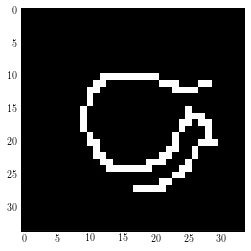

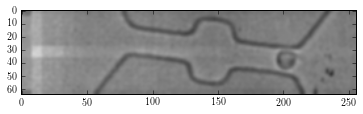

34
22 55 190 224


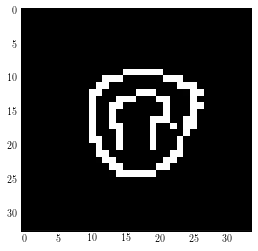

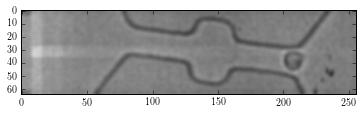

35
22 56 195 229


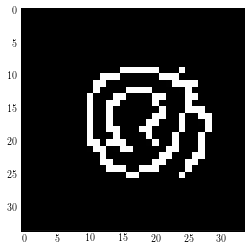

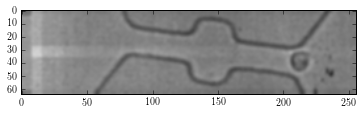

36
19 57 196 232


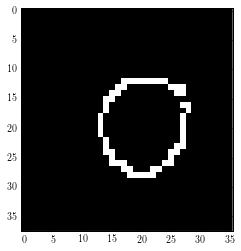

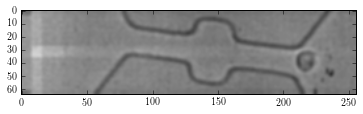

37
22 57 200 233


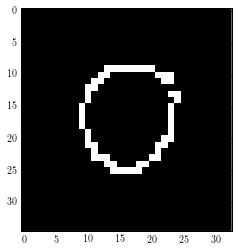

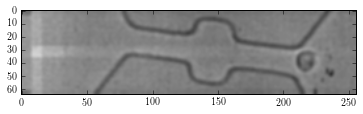

38
18 56 200 236


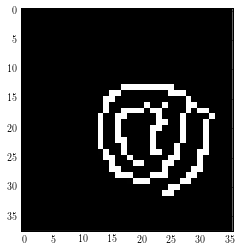

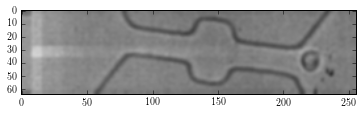

39
19 56 203 239


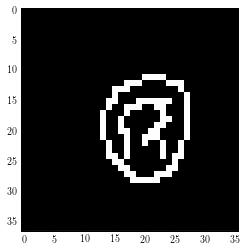

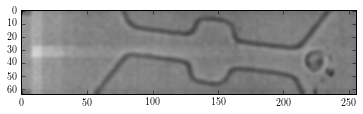

40
21 56 209 242


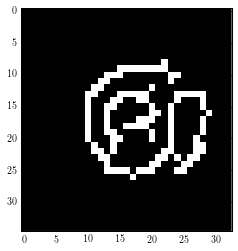

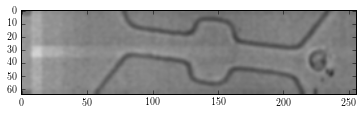

41
17 57 208 242


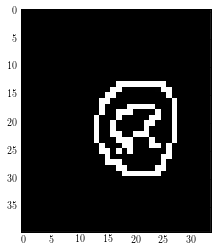

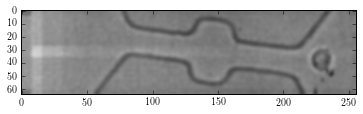

42
21 56 212 244


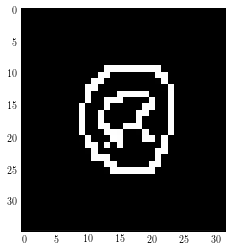

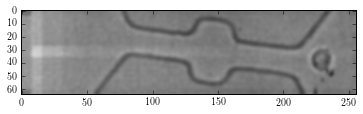

43
17 57 211 244


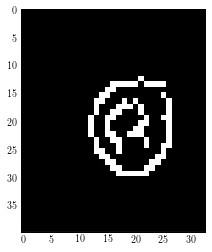

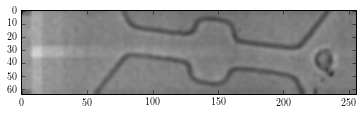

44
20 56 214 247


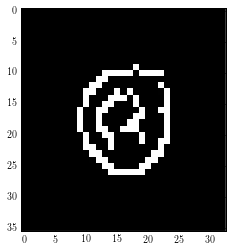

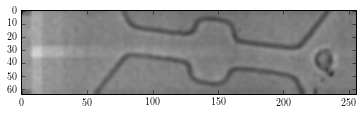

45
17 57 212 247


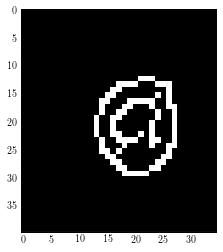

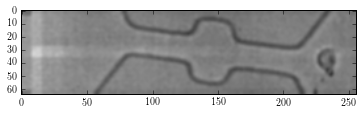

46
20 55 216 249


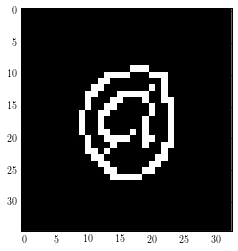

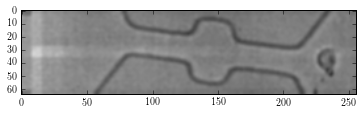

47
20 55 218 250


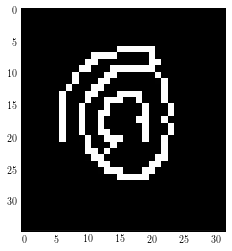

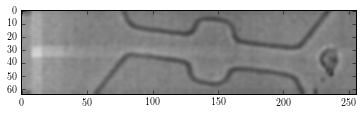

48
16 55 216 252


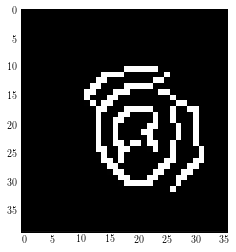

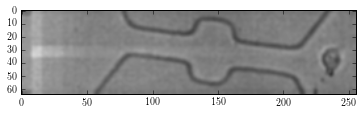

49
17 54 217 250


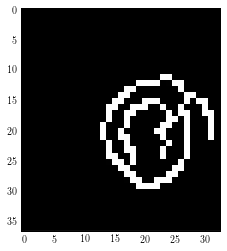

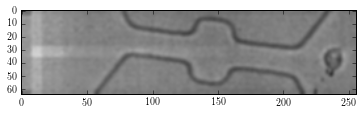

50
16 56 223 252


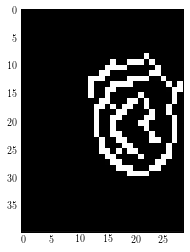

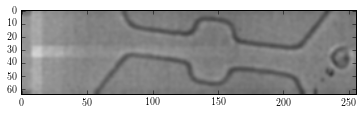

51
16 56 226 255


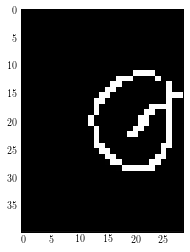

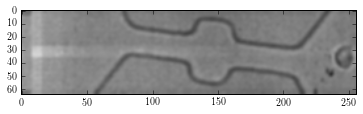

52
17 55 231 259


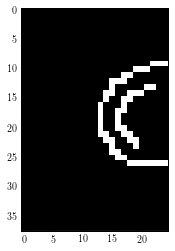

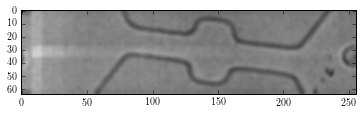

53
15 55 234 265


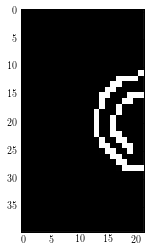

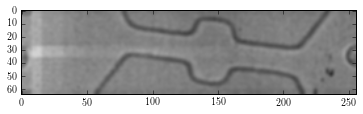

54
15 55 235 265


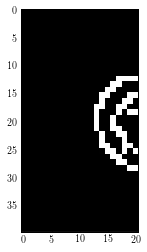

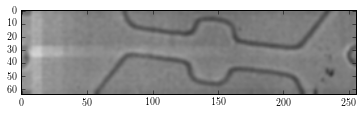

In [51]:
delta = 10

for i, frame in enumerate(frames):
    #frame_temp = cv2.GaussianBlur(frames[i] - template_frame, (5,5), 0)
    print i
    frame_temp = (frames[i] - template_frame) + .5
    
    row0 = clusters[i][:,0].min() - delta
    row1 = clusters[i][:,0].max() + delta
    
    col0 = clusters[i][:,1].min() - delta
    col1 = clusters[i][:,1].max() + delta
    
    if row0 < 0:
        row0 = 0
    if col0 < 0:
        col0 = 0
    
    print row0, row1, col0, col1
    
    window = cv2.cvtColor(np.uint8(256*\
                                   frame_temp[row0:row1, col0:col1]),\
                                   cv2.COLOR_GRAY2BGR)
    
    
    edges = cv2.Canny(window, 50, 200)
    #edges = cv2.Canny(window, 5, 175)
    
    if edges != None:
        #plt.imshow(window, cmap = 'gray', vmin = 0, vmax = 1)
        plt.imshow(edges, zorder = 100, cmap = 'gray', interpolation = 'none')
        #plt.imshow(frame_temp, cmap = 'gray', vmin = 0, vmax = 1)
    plt.show()
    
    plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
    plt.show()

In [132]:
print edges

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [34]:
new_template_frame = cv2.cvtColor(np.uint8(256*template_frame), cv2.COLOR_GRAY2BGR)
new_frame = cv2.cvtColor(np.uint8(256*frame), cv2.COLOR_GRAY2BGR)

In [35]:
edges_0 = cv2.Canny(new_template_frame, 15, 20)
edges_1 = cv2.Canny(new_frame, 15, 60)
edges_2 = edges_1 - edges_0

In [ ]:
plt.imshow(edges_0)
plt.show()

plt.imshow(edges_1)
plt.show()

fig = plt.figure(figsize = (16,10))
plt.imshow(edges_2)
plt.show()

In [ ]:
index = 10
frame = frames[index]
plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

In [ ]:
cluster = clusters[index]
pixels = frame[np.min(cluster[:,0]-5):np.max(cluster[:,0]+5), np.min(cluster[:,1]-5):np.max(cluster[:,1]+5)]
plt.imshow(pixels, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

In [ ]:
grad_mags = np.zeros((pixels.shape[0], pixels.shape[1]))
grad_direcs = np.zeros((pixels.shape[0], pixels.shape[1]))
for pix in pixels:
    for i in range()
    

In [ ]:
fig = plt.figure(figsize = (10,6))
for coord in coords:
    plt.scatter(coord[1], coord[0])
plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

# 1-D derivative method

In [187]:
reload(rp)

<module 'resistive_pulse' from 'resistive_pulse.pyc'>

In [188]:
offset = -1

boundaries_x = [np.empty((0,2), dtype = int) for i in range(len(clusters))]
boundaries_y = [np.empty((0,2), dtype = int) for i in range(len(clusters))]


for i in range(len(clusters)):
    start_row = np.min(clusters[i][:,0])-offset
    stop_row = np.max(clusters[i][:,0])+offset
    
    start_column = np.min(clusters[i][:,1])
    stop_column = np.max(clusters[i][:,1])
    
    for j in range(start_row, stop_row+1):
        data = gaussian_filter(neg_frames[i][j, start_column:stop_column+1], sigma = 1)
        maxima, minima = rp.get_maxima_minima(data, num_maxima = 0, num_minima = 2, return_by = 'low')

        if len(minima) == 2:
            
            
            boundaries_x[i] = np.vstack((boundaries_x[i], [start_column + minima[0], j]))
            boundaries_x[i] = np.vstack((boundaries_x[i], [start_column + minima[1], j]))
            
            
    start_row = np.min(clusters[i][:,0])
    stop_row = np.max(clusters[i][:,0])
    
    start_column = np.min(clusters[i][:,1])-offset
    stop_column = np.max(clusters[i][:,1])+offset
    
    for j in range(start_column, stop_column+1):
        data = gaussian_filter(neg_frames[i][start_row:stop_row+1, j], sigma = 1)
        maxima, minima = rp.get_maxima_minima(data, num_maxima = 0, num_minima = 2, return_by = 'low')

        if len(minima) == 2:
            boundaries_y[i] = np.vstack((boundaries_y[i], [j, start_row + minima[0]]))
            boundaries_y[i] = np.vstack((boundaries_y[i], [j, start_row + minima[1]]))

In [189]:
boundaries = []
for i in range(len(boundaries_x)):
    boundaries.append(np.vstack((boundaries_x[i], boundaries_y[i])))

### Calculate centroids

In [190]:
centroids = [np.zeros((2), dtype = float) for i in range(len(frames))]
for i in range(len(frames)):
    centroids[i][0] = np.mean(boundaries[i][:,0])
    centroids[i][1] = np.mean(boundaries[i][:,1])


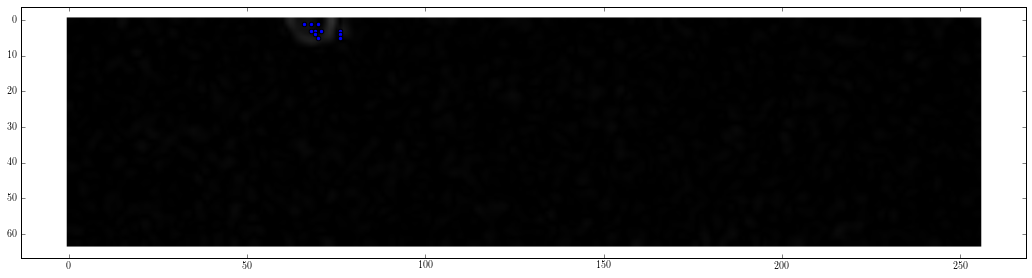

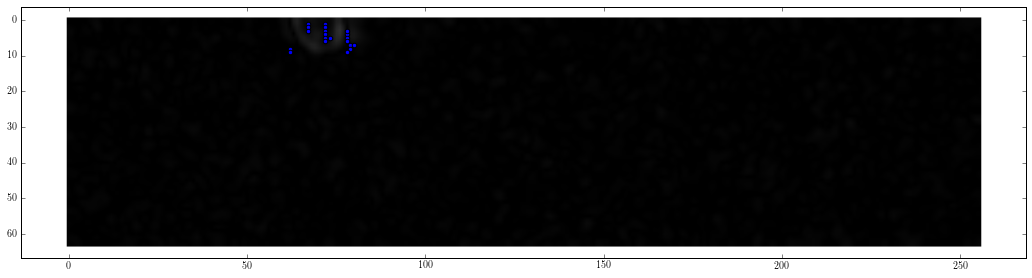

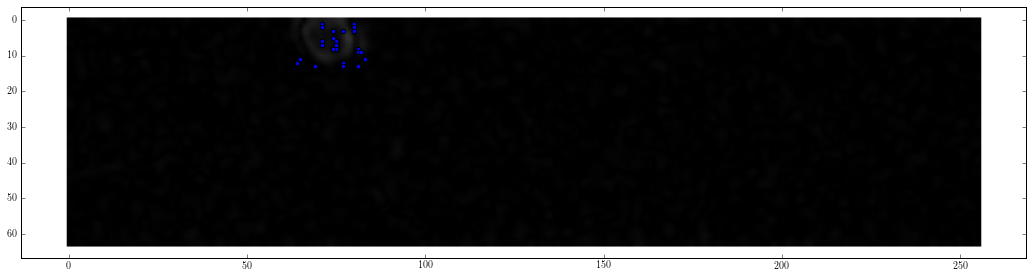

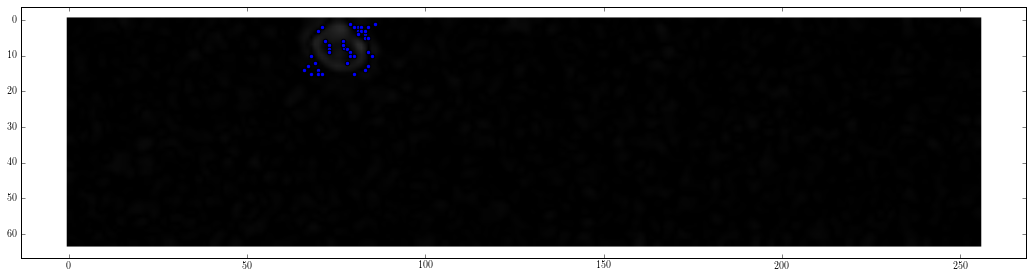

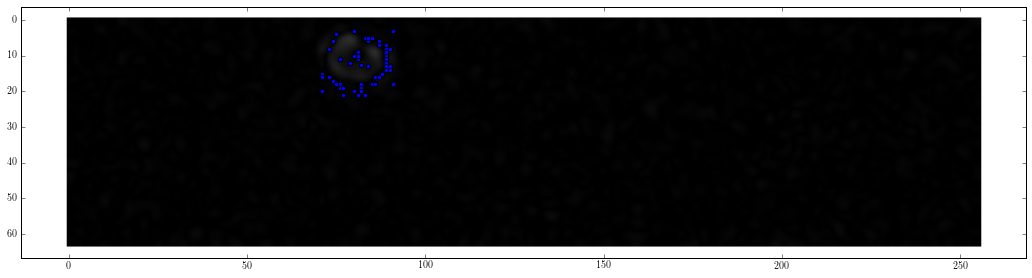

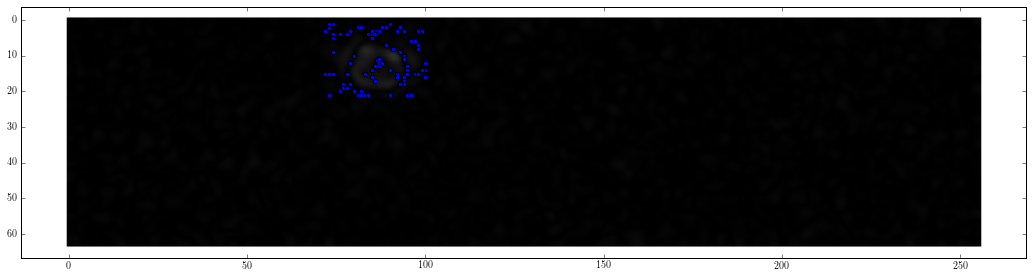

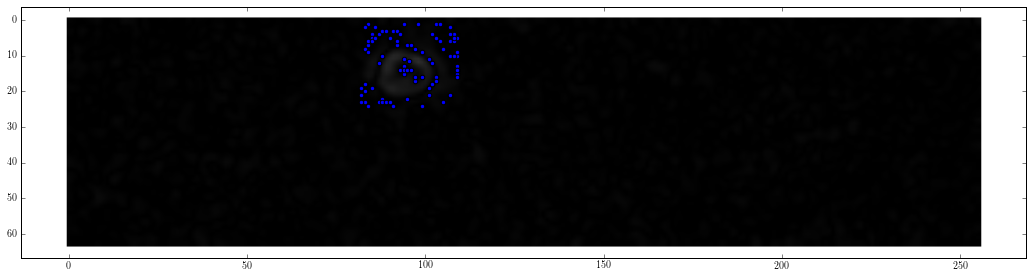

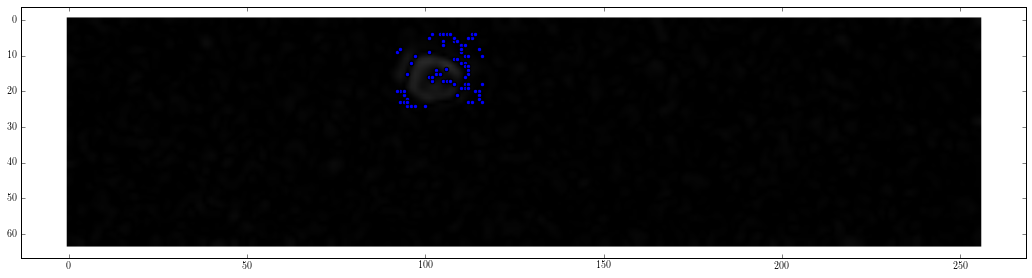

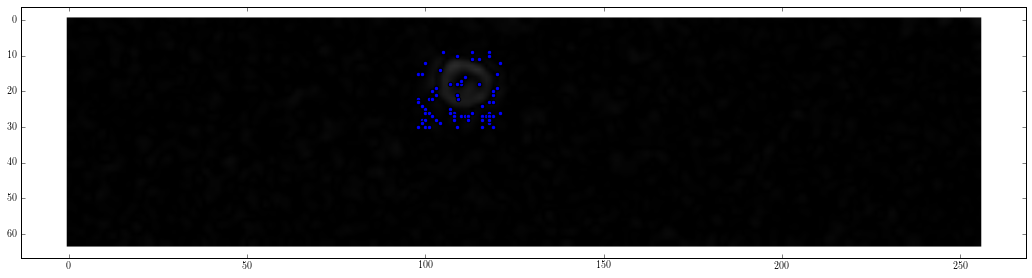

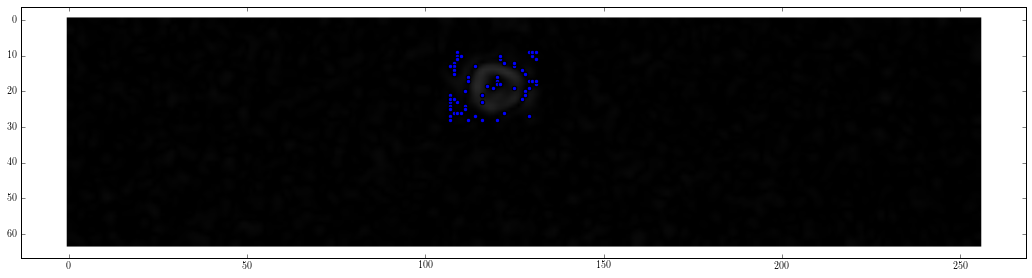

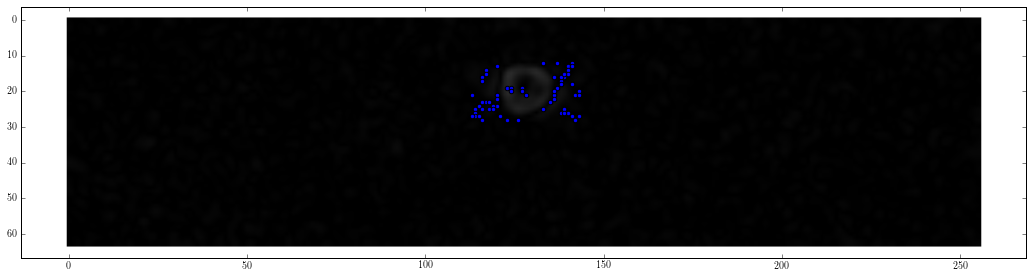

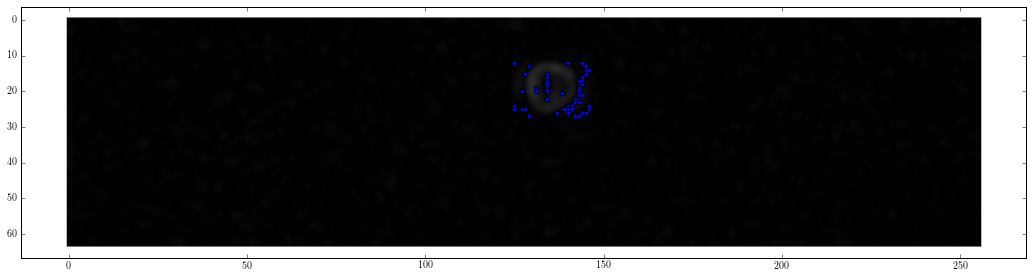

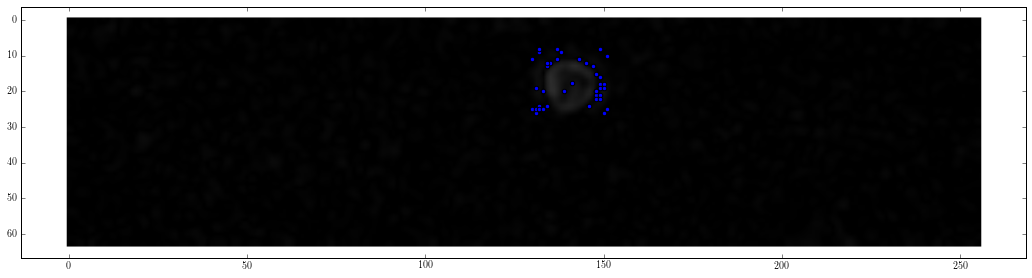

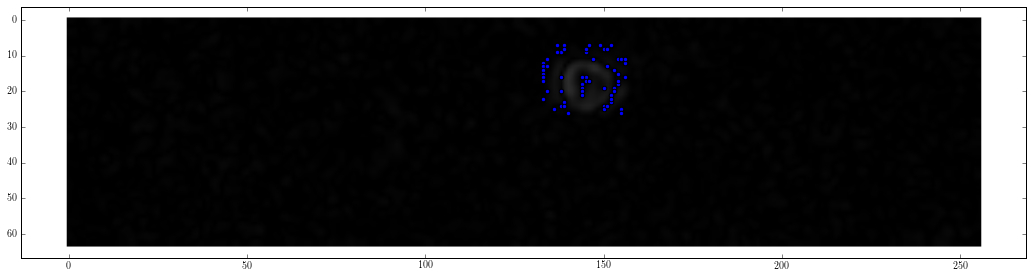

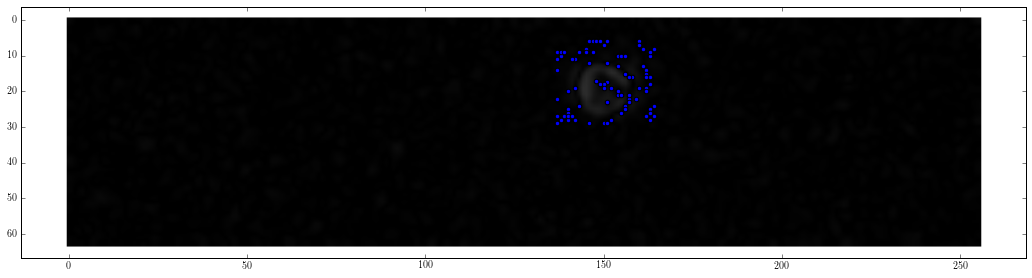

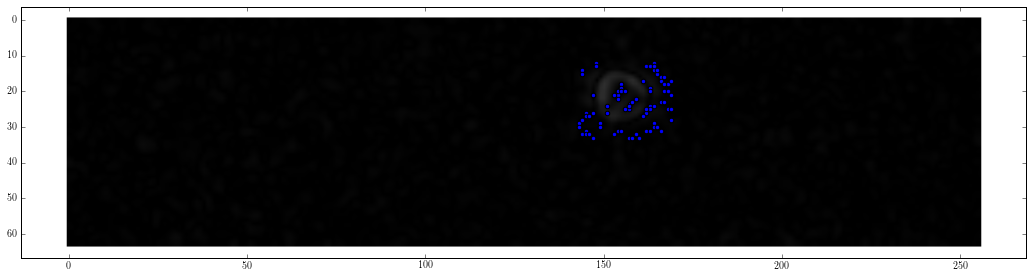

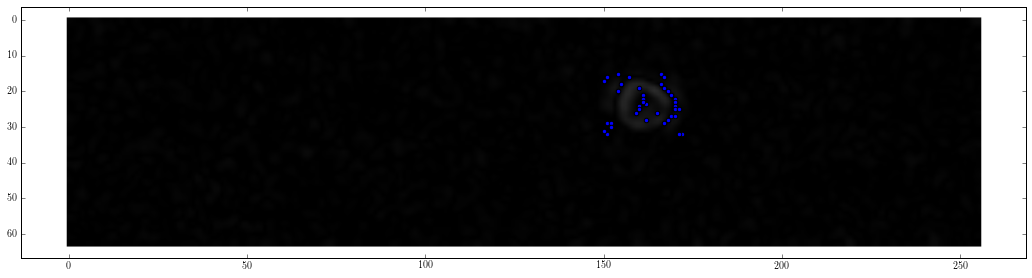

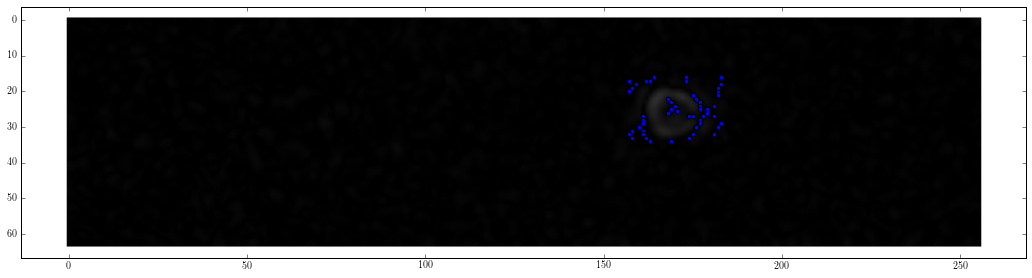

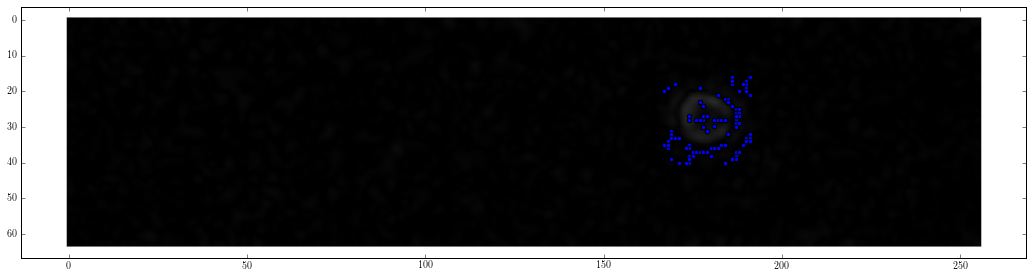

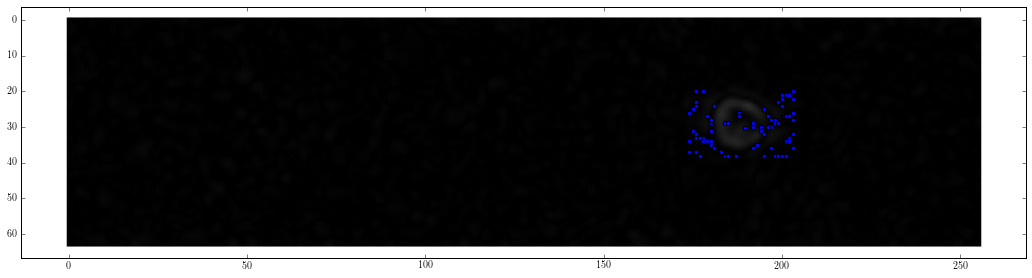

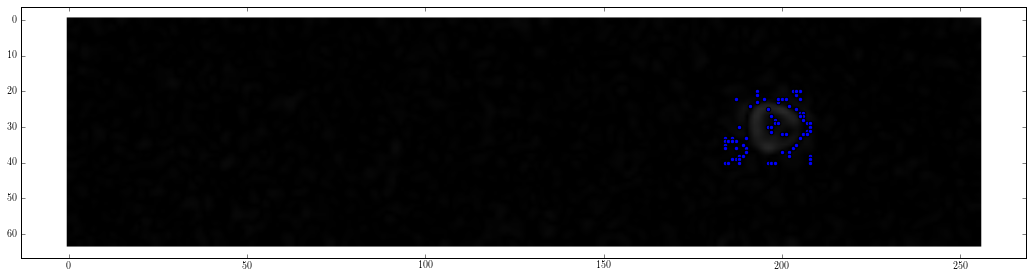

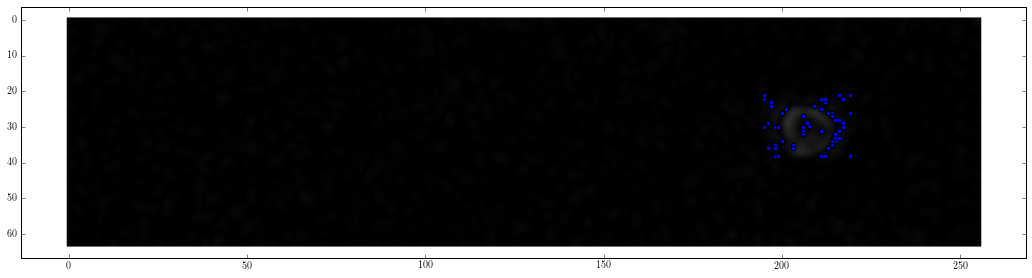

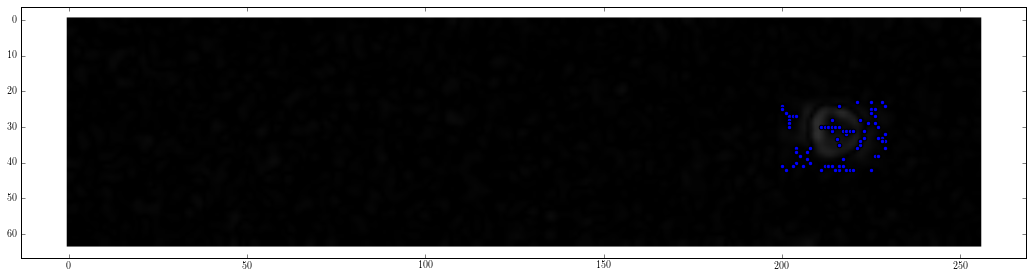

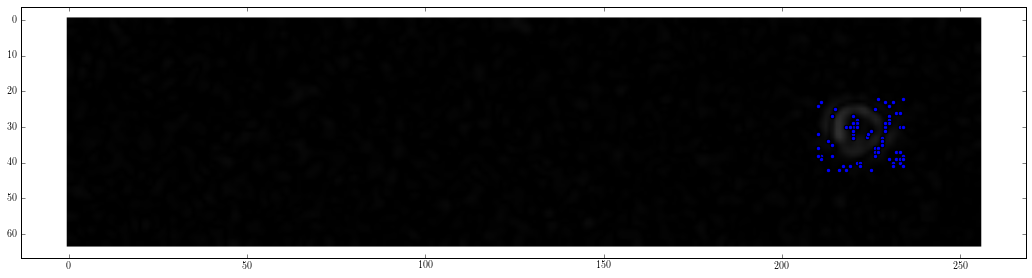

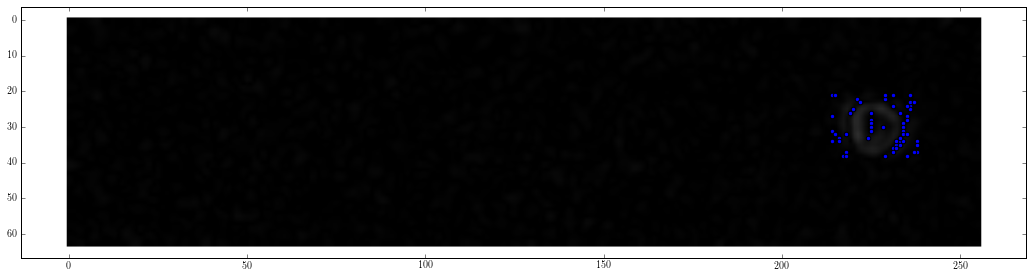

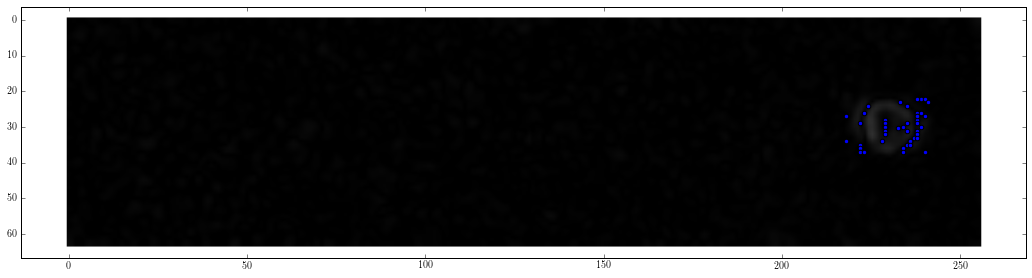

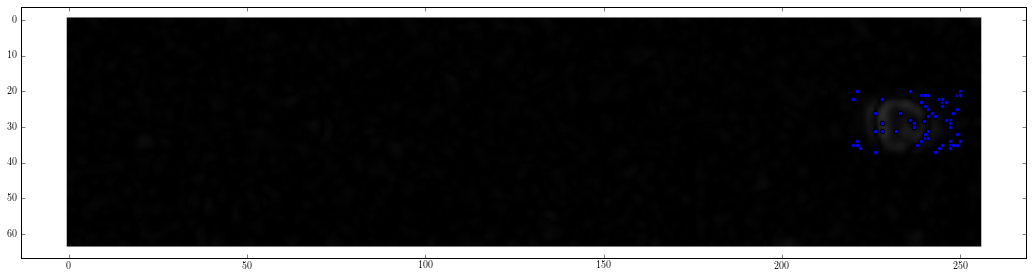

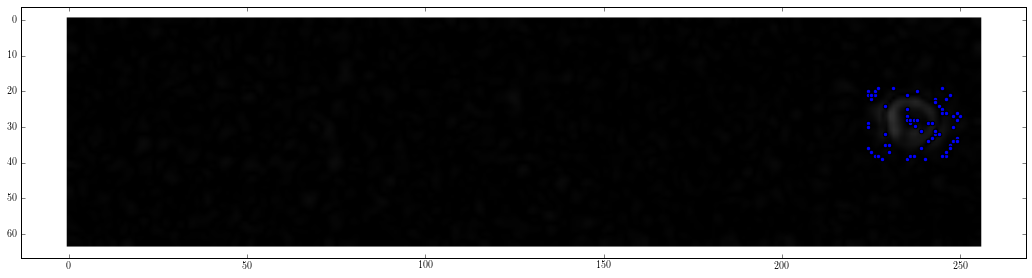

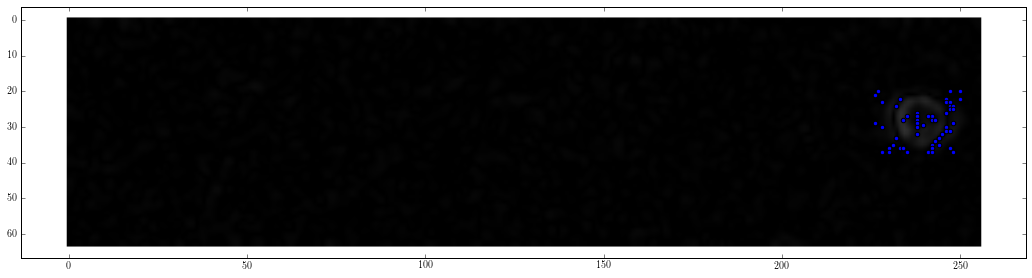

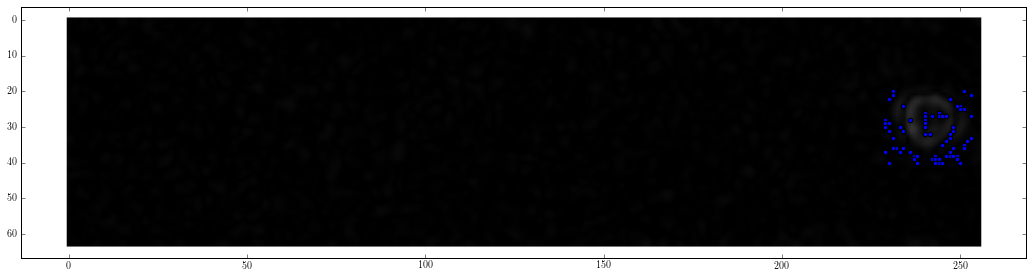

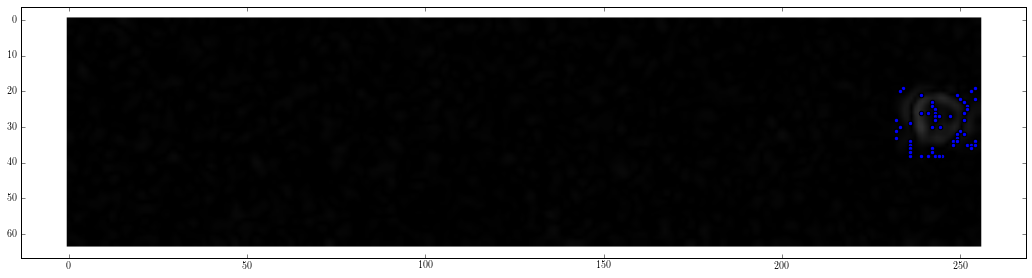

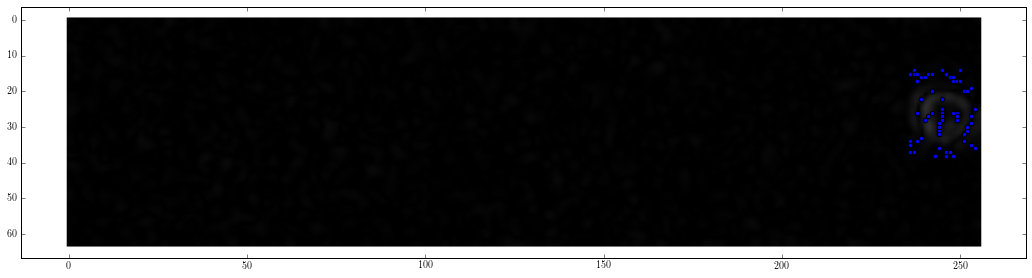

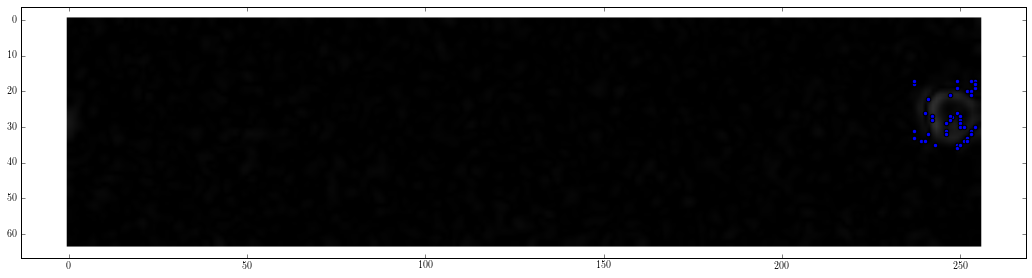

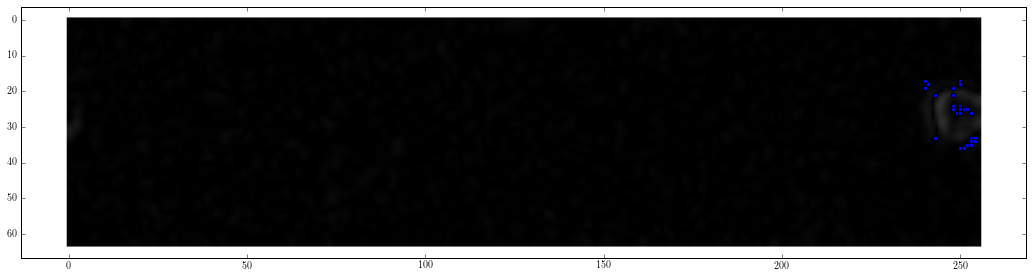

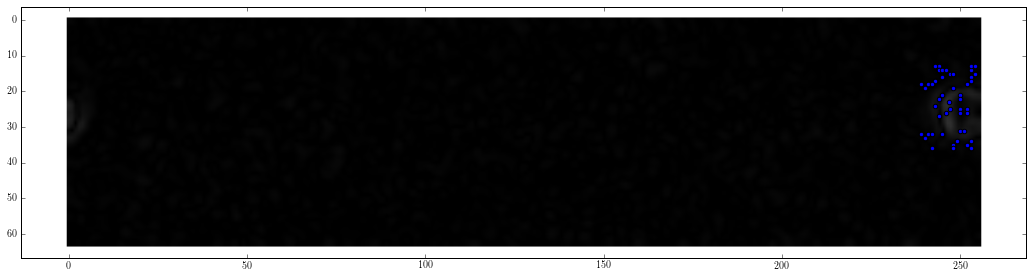

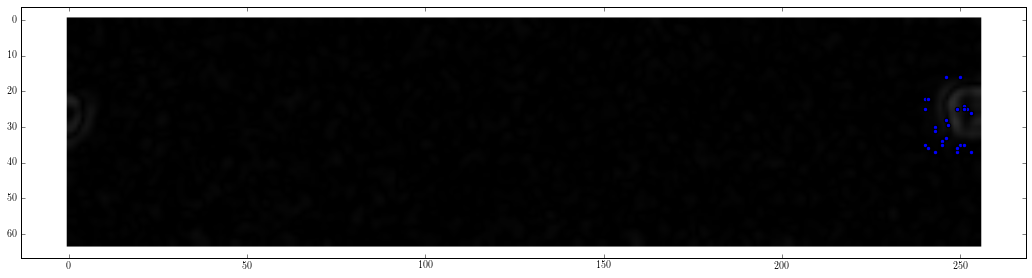

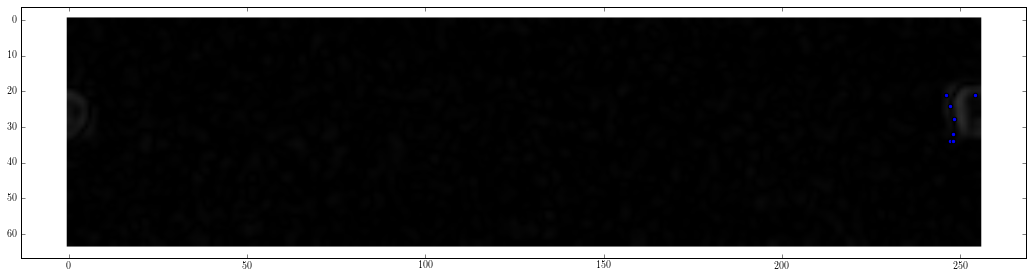

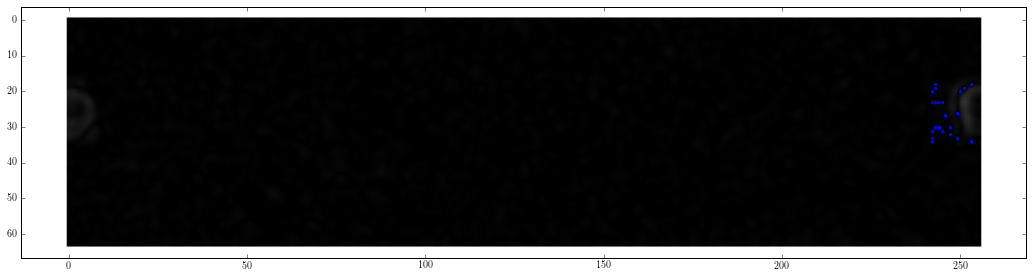

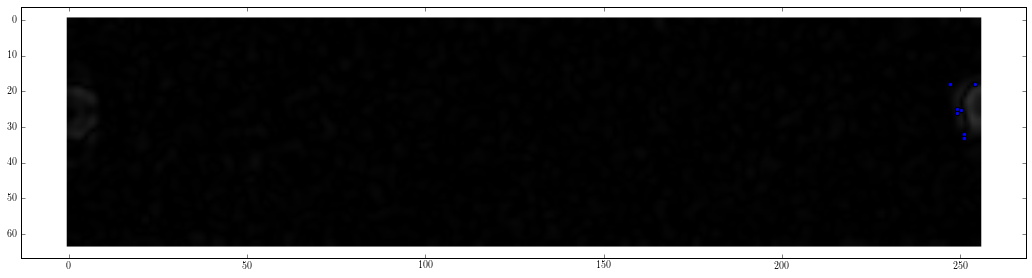

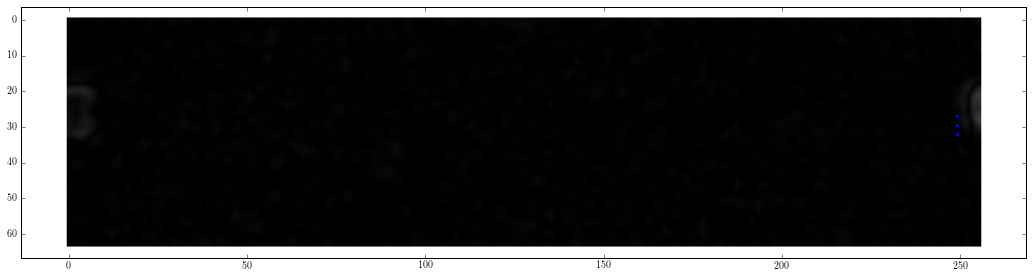

In [191]:
for i in range(len(frames)):
    index = i

    fig = plt.figure(figsize = (18, 12))
    plt.imshow(neg_frames[index], vmin = 0, vmax = 1, cmap = 'gray')
    try:
        plt.scatter(centroids[i][0], centroids[i][1])
        plt.scatter(boundaries[index][:,0], boundaries[index][:,1])
    except:
        pass
    plt.show()

# Remove outliers

In [ ]:
max_dist = 2
remove_list = []
for i in range(len(frames)):
    for j in range(boundaries[i].shape[0]):
        distances = ((boundaries[i][j,0]-boundaries[i][[k for k in range(boundaries[i].shape[0]) if k != j],0])**2.+\
        (boundaries[i][j,1]-boundaries[i][[k for k in range(boundaries[i].shape[0]) if k != j],1])**2.)**.5
        min_dist = np.min(distances)
        
        if min_dist > max_dist:
            remove_list.append(j)
            
    boundaries[i] = boundaries[i][[k for k in range(boundaries[i].shape[0]) if k not in remove_list],:]

# Plot radius vs theta

In [ ]:
for i in range(len(frames)):
    thetas = []
    rs = []
    for j in range(boundaries[i].shape[0]):
        dx = boundaries[i][j,0] - centroids[i][0]
        dy = boundaries[i][j,1] - centroids[i][1]
        theta = np.arctan2(dy, dx)
        if theta < 0:
            theta += 2*3.14159
        theta = theta*180/3.14159
        thetas.append(theta)
                
        rs.append((dx**2.+dy**2.)**.5)
        
    fig = plt.figure(figsize = (18,12))
    plt.imshow(frames[i], cmap = 'gray', vmin = 0, vmax = 1)
    plt.scatter(centroids[i][0], centroids[i][1])
    plt.scatter(boundaries[i][:,0], boundaries[i][:,1])
    plt.show()
    plt.scatter(thetas, rs)
    plt.ylim(0, max(rs))
    plt.xticks([0, 90, 180, 270, 360])
    plt.grid()
    plt.show()

# Plot aspect ratio

In [ ]:
aspects = []
for i in range(len(frames)):
    print np.max(boundaries[i][:,0]), np.min(boundaries[i][:,0]), np.max(boundaries[i][:,1]), np.min(boundaries[i][:,1])
    
    aspects.append(1.*(np.max(boundaries[i][:,0])-np.min(boundaries[i][:,0]))/(np.max(boundaries[i][:,1])-np.min(boundaries[i][:,1])))

In [ ]:
plt.scatter([i for i in range(len(aspects))], aspects)
plt.grid()
plt.show()

In [ ]:
for i, frame in enumerate(frames):
    plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1, origin = 'lower')
    plt.xticks([])
    plt.yticks([])
    plt.savefig('/home/preston/Desktop/Science/Research/cancer_cells/nsf_proposal/cell_deformations/'+str(i)+'.png', dpi = 300)
    plt.show()

In [ ]:
print 56/64.
print 65/58.
print 65/61.
print 59/64.
print 59/56.
print 58/70.